In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Cleaning

In [2]:
# Note: data downloaded from Yu group Github on 5/7/20
demo = pd.read_csv('data/county_data_abridged.csv')
demo.head()

,countyFIPS,STATEFP,COUNTYFP,CountyName,StateName,State,lat,lon,POP_LATITUDE,POP_LONGITUDE,...,>500 gatherings,public schools,restaurant dine-in,entertainment/gym,federal guidelines,foreign travel ban,SVIPercentile,HPSAShortage,HPSAServedPop,HPSAUnderservedPop
0,01001,1.0,1.0,Autauga,AL,Alabama,32.540091,-86.645649,32.500389,-86.494165,...,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.4354,NaN,NaN,NaN
1,01003,1.0,3.0,Baldwin,AL,Alabama,30.738314,-87.726272,30.548923,-87.762381,...,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.2162,NaN,NaN,NaN
2,01005,1.0,5.0,Barbour,AL,Alabama,31.874030,-85.397327,31.844036,-85.310038,...,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.9959,6.08,5400.0,18241.0
3,01007,1.0,7.0,Bibb,AL,Alabama,32.999024,-87.125260,33.030921,-87.127659,...,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.6003,2.75,14980.0,6120.0
4,01009,1.0,9.0,Blount,AL,Alabama,33.990440,-86.562711,33.955243,-86.591491,...,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.4242,7.21,31850.0,25233.0


In [3]:
# Note: data downloaded from CSSE Github on 5/7/20
infections = pd.read_csv('data/05-06-2020.csv')
infections.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-07 02:32:32,32.3182,-86.9023,8691,343,NaN,8348.0,1,185.352760,109516.0,1158.0,3.946611,84000001,USA,2335.645249,13.324128
1,Alaska,US,2020-05-07 02:32:32,61.3707,-152.4044,372,10,284.0,78.0,2,62.233479,23655.0,NaN,2.688172,84000002,USA,3957.346645,NaN
2,American Samoa,US,2020-05-07 02:32:32,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,83.0,NaN,NaN,16,ASM,149.170576,NaN
3,Arizona,US,2020-05-07 02:32:32,33.7298,-111.4312,9707,426,1693.0,7588.0,4,133.361415,91737.0,1430.0,4.388586,84000004,USA,1260.345745,14.731637
4,Arkansas,US,2020-05-07 02:32:32,34.9697,-92.3731,3611,87,2109.0,1415.0,5,139.473246,59003.0,453.0,2.409305,84000005,USA,2278.964260,12.545001


In [4]:
# Note: data downloaded from CSSE Github on 5/7/20
deaths = pd.read_csv('data/time_series_covid19_deaths_US.csv')
deaths.head(10)

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271000,-170.132000,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.444300,144.793700,...,5,5,5,5,5,5,5,5,5,5
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.097900,145.673900,...,2,2,2,2,2,2,2,2,2,2
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.220800,-66.590100,...,86,86,92,94,95,97,97,99,99,102
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.335800,-64.896300,...,4,4,4,4,4,4,4,4,4,4
5,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,4,4,4,3,3,3,3,3,3,3
6,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,3,3,3,4,4,4,4,5,5,5
7,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,0,1,1,1,1,1,1,1,1,1
8,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,0,0,0,0,0,0,0,0,0,0
9,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Note: data downloaded from CSSE Github on 5/7/20
cases = pd.read_csv('data/time_series_covid19_confirmed_US.csv')
cases.head(10)

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271000,-170.132000,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.444300,144.793700,...,141,141,145,145,145,145,145,145,149,149
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.097900,145.673900,...,14,14,14,14,14,14,14,14,15,15
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.220800,-66.590100,...,1400,1433,1539,1575,1757,1808,1843,1924,1968,2031
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.335800,-64.896300,...,57,57,66,66,66,66,66,66,66,66
5,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,40,43,44,42,45,48,53,53,58,61
6,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,171,174,174,175,181,187,188,189,196,205
7,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,37,37,39,42,43,45,45,47,47,51
8,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,42,42,42,42,42,43,42,43,43,44
9,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,34,36,37,39,40,40,40,40,42,44


In [6]:
demo.shape

(3244, 87)

In [7]:
demo.columns

Index(['countyFIPS', 'STATEFP', 'COUNTYFP', 'CountyName', 'StateName', 'State',
       'lat', 'lon', 'POP_LATITUDE', 'POP_LONGITUDE', 'CensusRegionName',
       'CensusDivisionName', 'Rural-UrbanContinuumCode2013',
       'PopulationEstimate2018', 'PopTotalMale2017', 'PopTotalFemale2017',
       'FracMale2017', 'PopulationEstimate65+2017',
       'PopulationDensityperSqMile2010', 'CensusPopulation2010',
       'MedianAge2010', '#EligibleforMedicare2018',
       'MedicareEnrollment,AgedTot2017', '3-YrDiabetes2015-17',
       'DiabetesPercentage', 'HeartDiseaseMortality', 'StrokeMortality',
       'Smokers_Percentage', 'RespMortalityRate2014', '#FTEHospitalTotal2017',
       'TotalM.D.'s,TotNon-FedandFed2017', '#HospParticipatinginNetwork2017',
       '#Hospitals', '#ICU_beds', 'dem_to_rep_ratio', 'PopMale<52010',
       'PopFmle<52010', 'PopMale5-92010', 'PopFmle5-92010', 'PopMale10-142010',
       'PopFmle10-142010', 'PopMale15-192010', 'PopFmle15-192010',
       'PopMale20-242010', 'P

In [8]:
demo.iloc[:, :14].isna().sum()

countyFIPS                        0
STATEFP                          23
COUNTYFP                         23
CountyName                        0
StateName                         0
State                           169
lat                             169
lon                             169
POP_LATITUDE                     23
POP_LONGITUDE                    23
CensusRegionName                 98
CensusDivisionName               98
Rural-UrbanContinuumCode2013     24
PopulationEstimate2018           23
dtype: int64

In [9]:
deaths.iloc[:, :14].isna().sum()

UID                0
iso2               0
iso3               0
code3              0
FIPS              10
Admin2             7
Province_State     0
Country_Region     0
Lat                0
Long_              0
Combined_Key       0
Population         0
1/22/20            0
1/23/20            0
dtype: int64

In [10]:
deaths.shape

(3261, 119)

In [11]:
deaths[deaths['FIPS'].isna()]

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20
3147,84070002,US,USA,840,NaN,Dukes and Nantucket,Massachusetts,US,41.406747,-70.687635,...,1,1,1,1,1,1,1,1,1,1
3148,84070003,US,USA,840,NaN,Kansas City,Missouri,US,39.099700,-94.578600,...,16,16,16,16,16,16,16,16,16,16
3253,84070004,US,USA,840,NaN,Michigan Department of Corrections (MDOC),Michigan,US,0.000000,0.000000,...,38,41,42,42,42,42,45,48,48,50
3254,84070005,US,USA,840,NaN,Federal Correctional Institution (FCI),Michigan,US,0.000000,0.000000,...,1,1,2,2,2,2,2,2,2,3
3255,84070015,US,USA,840,NaN,Bear River,Utah,US,41.521068,-113.083282,...,1,1,1,1,1,1,1,1,1,1
3256,84070016,US,USA,840,NaN,Central Utah,Utah,US,39.372319,-111.575868,...,0,0,0,0,0,0,0,0,0,0
3257,84070017,US,USA,840,NaN,Southeast Utah,Utah,US,38.996171,-110.701396,...,0,0,0,0,0,0,0,0,0,0
3258,84070018,US,USA,840,NaN,Southwest Utah,Utah,US,37.854472,-111.441876,...,2,2,2,2,2,2,2,3,3,3
3259,84070019,US,USA,840,NaN,TriCounty,Utah,US,40.124915,-109.517442,...,0,0,0,0,0,0,0,0,0,0
3260,84070020,US,USA,840,NaN,Weber-Morgan,Utah,US,41.271160,-111.914512,...,2,2,2,2,2,2,2,2,2,2


In [12]:
# dropping these 10 rows should not bias our analysis later on
deaths['FIPS'] = deaths['FIPS'].fillna(-1).astype(int)

In [13]:
cases.iloc[:, :14].isna().sum()

UID                0
iso2               0
iso3               0
code3              0
FIPS              10
Admin2             7
Province_State     0
Country_Region     0
Lat                0
Long_              0
Combined_Key       0
1/22/20            0
1/23/20            0
1/24/20            0
dtype: int64

In [14]:
cases['FIPS'] = cases['FIPS'].fillna(-1).astype(int)

In [15]:
demo['countyFIPS'].str.isnumeric().value_counts()

True     3242
False       2
Name: countyFIPS, dtype: int64

In [16]:
demo.iloc[-2:]

,countyFIPS,STATEFP,COUNTYFP,CountyName,StateName,State,lat,lon,POP_LATITUDE,POP_LONGITUDE,...,>500 gatherings,public schools,restaurant dine-in,entertainment/gym,federal guidelines,foreign travel ban,SVIPercentile,HPSAShortage,HPSAServedPop,HPSAUnderservedPop
3242,City1,NaN,NaN,New York City,NY,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3243,City2,NaN,NaN,Kansas City,MO,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# since there appears to be no info for these 2 rows, we will drop them
demo = demo.iloc[:-2]
demo['countyFIPS'].str.isnumeric().value_counts()

True    3242
Name: countyFIPS, dtype: int64

In [18]:
demo['FIPS'] = demo['countyFIPS'].astype(int)

In [19]:
# now we can merge demo data with ts data on FIPS
print(len(deaths), len(cases))
deaths = deaths.merge(demo, on = 'FIPS')
cases = cases.merge(demo, on = 'FIPS')
print(len(deaths), len(cases))


3261 3261
3140 3140


# Death Rate

### Hypothesis: Hospital Quality and Age will be correlated to death rate

In [20]:
death_rate = 100*deaths['5/6/20']/cases['5/6/20'].fillna(0)

In [21]:
print('average mortality rate:', death_rate.mean())
print('varaince in mortality rate:', death_rate.var())
print('max mortality rate:', death_rate.max())
print('min mortality rate:', death_rate.min())

average mortality rate: 3.612419113481636
varaince in mortality rate: 41.74665295054812
max mortality rate: 100.0
min mortality rate: 0.0


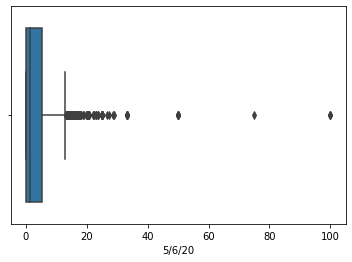

In [22]:
sns.boxplot(death_rate)

In [23]:
death_rate[death_rate > 20].count()

55

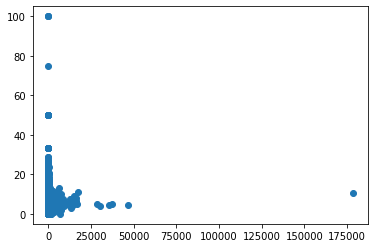

In [24]:
plt.scatter(cases['5/6/20'], death_rate)

(0, 10000)

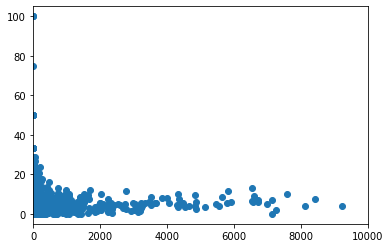

In [110]:
plt.scatter(cases['5/6/20'], death_rate)
plt.xlim([0, 10000])

In [80]:
deaths.iloc[2962].loc['1/22/20':'5/6/20']

1/22/20    0
1/23/20    0
1/24/20    0
1/25/20    0
1/26/20    0
          ..
5/2/20     0
5/3/20     0
5/4/20     0
5/5/20     0
5/6/20     0
Name: 2962, Length: 106, dtype: object

In [32]:
cases['death_rate'] = death_rate
cases = cases.rename(columns = {'5/6/20' : 'cur_cases'})

In [33]:
cases_filtered = cases[cases['cur_cases'] > 50]

In [34]:
cases.columns

Index(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
       'Country_Region', 'Lat', 'Long_',
       ...
       'public schools', 'restaurant dine-in', 'entertainment/gym',
       'federal guidelines', 'foreign travel ban', 'SVIPercentile',
       'HPSAShortage', 'HPSAServedPop', 'HPSAUnderservedPop', 'death_rate'],
      dtype='object', length=206)

In [38]:
income = pd.read_excel('data/Unemployment.xls', header = 4)
income.head()

,FIPS,State,Area_name,Rural_urban_continuum_code_2013,Urban_influence_code_2013,Metro_2013,Civilian_labor_force_2007,Employed_2007,Unemployed_2007,Unemployment_rate_2007,...,Civilian_labor_force_2017,Employed_2017,Unemployed_2017,Unemployment_rate_2017,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018
0,0,US,United States,NaN,NaN,NaN,152191093.0,145156134.0,7034959.0,4.6,...,160273906.0,153293830.0,6980076.0,4.36,161640488.0,155344043.0,6296445.0,3.9,61937.0,NaN
1,1000,AL,Alabama,NaN,NaN,NaN,2175612.0,2089127.0,86485.0,4.0,...,2178243.0,2081676.0,96567.0,4.40,2198837.0,2112347.0,86490.0,3.9,49881.0,100.0000
2,1001,AL,"Autauga County, AL",2.0,2.0,1.0,24383.0,23577.0,806.0,3.3,...,25972.0,24958.0,1014.0,3.90,25957.0,25015.0,942.0,3.6,59338.0,118.9591
3,1003,AL,"Baldwin County, AL",3.0,2.0,1.0,82659.0,80099.0,2560.0,3.1,...,92090.0,88342.0,3748.0,4.10,93849.0,90456.0,3393.0,3.6,57588.0,115.4508
4,1005,AL,"Barbour County, AL",6.0,6.0,0.0,10334.0,9684.0,650.0,6.3,...,8317.0,7831.0,486.0,5.80,8373.0,7940.0,433.0,5.2,34382.0,68.9280


In [39]:
income = income[['FIPS', 'Median_Household_Income_2018']]
income

,FIPS,Median_Household_Income_2018
0,0,61937.0
1,1000,49881.0
2,1001,59338.0
3,1003,57588.0
4,1005,34382.0
...,...,...
3270,72145,NaN
3271,72147,NaN
3272,72149,NaN
3273,72151,NaN


In [40]:
income['FIPS'] = income['FIPS'].astype(int)

In [42]:
income_v_dr = cases_filtered[['FIPS', 'death_rate']].merge(income, on = 'FIPS')

Text(0, 0.5, 'Death Rate as of 5/6/20')

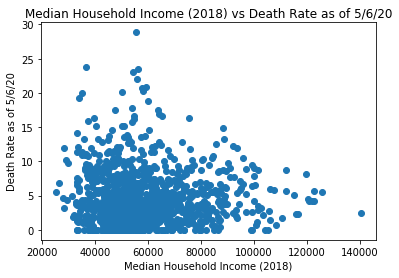

In [140]:
plt.scatter(income_v_dr['Median_Household_Income_2018'], income_v_dr['death_rate'])
plt.title('Median Household Income (2018) vs Death Rate as of 5/6/20')
plt.xlabel('Median Household Income (2018)')
plt.ylabel('Death Rate as of 5/6/20')

This plot suggests an inverse relationship. While there is not a perfect correlation here, I think this suggests that median household income will be a good feature to use when predicting death rate.

In [57]:
cases_filtered['over_65_2010'] = ((cases_filtered['PopMale75-842010'] + cases_filtered['PopFmle75-842010']
                                  + cases_filtered['PopMale75-842010'] + cases_filtered['PopFmle75-842010'] 
                                  + cases_filtered['PopMale>842010'] + cases_filtered['PopFmle>842010']) / 
                                  cases_filtered['CensusPopulation2010'])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Text(0, 0.5, 'Death Rate as of 5/6/20')

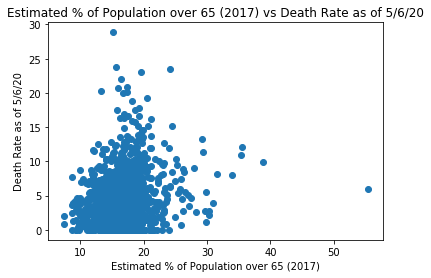

In [72]:
plt.scatter(100 * cases_filtered['PopulationEstimate65+2017']/cases_filtered['PopulationEstimate2018'], cases_filtered['death_rate'])
plt.title('Estimated % of Population over 65 (2017) vs Death Rate as of 5/6/20')
plt.xlabel('Estimated % of Population over 65 (2017)')
plt.ylabel('Death Rate as of 5/6/20')

Based on this plot, age does not seem like a good feature to use when trying to predict death rate. In fact, it appears that the higher death rate.

Text(0, 0.5, 'Death Rate as of 5/6/20')

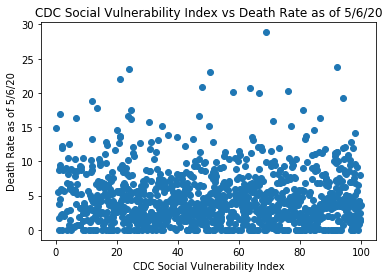

In [67]:
plt.scatter(100 * cases_filtered['SVIPercentile'], cases_filtered['death_rate'])
plt.title('CDC Social Vulnerability Index vs Death Rate as of 5/6/20')
plt.xlabel('CDC Social Vulnerability Index')
plt.ylabel('Death Rate as of 5/6/20')

Similarly, the CDC's Social Vulnerability Index does not seem to have any correlation to death rate

In [ ]:
cases_filtered['hosp_per_pop'] = cases_filtered['#Hospitals']/cases_filtered['PopulationEstimate2018']
cases_filtered['hosp_per_pop'] = cases_filtered['#Hospitals']/cases_filtered['PopulationEstimate2018']

Text(0, 0.5, 'Death Rate as of 5/6/20')

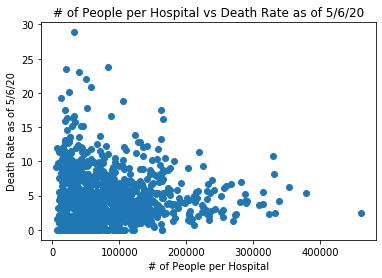

In [75]:
plt.scatter(cases_filtered['PopulationEstimate2018']/cases_filtered['#Hospitals'], cases_filtered['death_rate'])
plt.title('# of People per Hospital vs Death Rate as of 5/6/20')
plt.xlabel('# of People per Hospital')
plt.ylabel('Death Rate as of 5/6/20')

Text(0, 0.5, 'Death Rate as of 5/6/20')

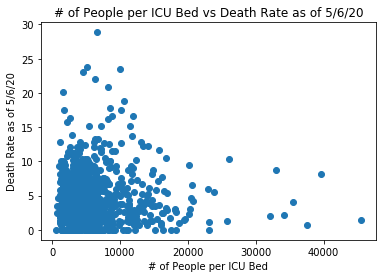

In [77]:
plt.scatter(cases_filtered['PopulationEstimate2018']/cases_filtered['#ICU_beds'], cases_filtered['death_rate'])
plt.title('# of People per ICU Bed vs Death Rate as of 5/6/20')
plt.xlabel('# of People per ICU Bed')
plt.ylabel('Death Rate as of 5/6/20')

Text(0, 0.5, 'Death Rate as of 5/6/20')

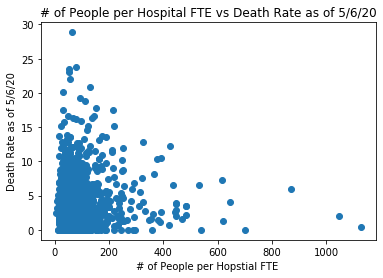

In [79]:
plt.scatter(cases_filtered['PopulationEstimate2018']/cases_filtered['#FTEHospitalTotal2017'], cases_filtered['death_rate'])
plt.title('# of People per Hospital FTE vs Death Rate as of 5/6/20')
plt.xlabel('# of People per Hopstial FTE ')
plt.ylabel('Death Rate as of 5/6/20')

All three of these heathcare resources appear to be good indicators of death rate.

In [83]:
dr = cases_filtered[['FIPS', 'death_rate', 'PopulationEstimate2018', '#Hospitals', '#ICU_beds', '#FTEHospitalTotal2017']].merge(
                    income, on = 'FIPS')

In [114]:
dr['#Hospitals'].value_counts()

1.0     468
2.0     229
3.0     112
0.0      91
4.0      68
5.0      31
6.0      23
7.0      15
8.0      13
9.0      10
10.0     10
12.0      6
15.0      4
11.0      3
34.0      2
24.0      2
14.0      2
17.0      2
19.0      2
76.0      1
13.0      1
16.0      1
18.0      1
46.0      1
22.0      1
Name: #Hospitals, dtype: int64

In [116]:
dr['#ICU_beds'].value_counts()

0.0      223
6.0       45
8.0       45
10.0      36
4.0       31
        ... 
401.0      1
331.0      1
203.0      1
189.0      1
410.0      1
Name: #ICU_beds, Length: 234, dtype: int64

In [117]:
dr['#FTEHospitalTotal2017'].value_counts()

0.0       83
412.0      3
348.0      3
241.0      3
143.0      3
          ..
2962.0     1
654.0      1
1866.0     1
3688.0     1
6710.0     1
Name: #FTEHospitalTotal2017, Length: 922, dtype: int64

In [121]:
dr['pop_per_hosp'] = dr['PopulationEstimate2018']/(dr['#Hospitals'] + .001)
dr['pop_per_icu_bed'] = dr['PopulationEstimate2018']/(dr['#ICU_beds'] + .001)
dr['pop_per_hosp_fte'] = dr['PopulationEstimate2018']/(dr['#FTEHospitalTotal2017'] + .001)
dr.isna().sum()

FIPS                            0
death_rate                      0
PopulationEstimate2018          0
#Hospitals                      0
#ICU_beds                       0
#FTEHospitalTotal2017           0
Median_Household_Income_2018    0
pop_per_hosp                    0
pop_per_icu_bed                 0
pop_per_hosp_fte                0
dtype: int64

In [122]:
max(dr['pop_per_hosp'])

221091000.0

In [141]:
X = dr[['pop_per_hosp', 'pop_per_icu_bed', 'pop_per_hosp_fte', 'Median_Household_Income_2018']]
y = dr['death_rate']

In [142]:
def rmse(pred, real):
    return np.sqrt(np.mean(np.square(pred - real)))

In [146]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20)

In [147]:
print('mean predictor rmse:', rmse(np.mean(y_train)*np.ones(len(y_test)), y_test))

mean predictor rmse: 4.022292655373633


In [148]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
print('model rmse:', rmse(model.predict(X_test), y_test))

model rmse: 4.0162409802457155
